# Prova Dati Lavarone Chiesa - 2019-03-21

## Metodo dei momenti

Matteo Franzoi - 2019-03-21

---

In [47]:
import os
from pandas import *
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as datetime
from scipy.stats import genextreme, gumbel_r
from numpy import linspace
import numpy as np

In [17]:
os.getcwd()

'/media/Dati/jupyter/prova'

In [18]:
os.listdir()

['.ipynb_checkpoints',
 'Coordinate.csv',
 'provaLavarone20190321_01.ipynb',
 'prova_coordinate.ipynb',
 'prova_gaussiana.ipynb',
 't0032.csv',
 'Untitled.ipynb',
 'voti.ipynb',
 'voti.xlsx']

In [73]:
pd.set_option('display.max_rows', 15)
data = pd.read_csv('t0032.csv')
map(datetime, data['anno'])
data = data.set_index('anno')
data

,totale
anno,
1992,1441.8
1993,1380.4
1994,1251.8
1995,944.4
1996,1375.4
1997,821.6
1998,NaN
...,...
2013,1644.4


In [74]:
len(data)

28

### Applico il metodo dei momenti

In [75]:
means = np.mean(data)
means

totale    1248.766667
dtype: float64

In [76]:
variances = data.var()
variances

totale    114859.243529
dtype: float64

In [77]:
stds = data.std()
stds

totale    338.908902
dtype: float64

---

In [78]:
b = math.sqrt(6) / math.pi
b

0.779696801233676

In [79]:
EulerGamma = 0.577215664901532860606512090

In [80]:
def g(m,s):
    return pd.DataFrame([m-b*EulerGamma*s, b*s], index = ['a', 'b'])

In [81]:
abs_m = g(means, stds)
abs_m

,totale
a,1096.239628
b,264.246186


In [82]:
abs_m.to_pickle('abs_m')

In [83]:
os.listdir()

['.ipynb_checkpoints',
 'abs_m',
 'Coordinate.csv',
 'momentiLavarone20190321_01.ipynb',
 'prova_coordinate.ipynb',
 'prova_gaussiana.ipynb',
 't0032.csv',
 'Untitled.ipynb',
 'voti.ipynb',
 'voti.xlsx']

In [84]:
def gumbel(x, abs_d, col):
    return np.exp(-np.exp(-(x - abs_d[col]['a'])/abs_d[col]['b']))

In [85]:
from statsmodels.distributions.empirical_distribution import ECDF

In [86]:
ecdf = ECDF(data['totale'])

In [87]:
data.min()

totale    821.6
dtype: float64

In [88]:
data.max()

totale    2100.6
dtype: float64

In [89]:
t_rain = np.linspace(data.min(), data.max(), 100)

In [90]:
gb = pd.DataFrame([
    gumbel(t_rain, abs_m, 'totale')
]).T
gb.index = t_rain
gb.columns = ['totale']
gb

,totale
821.600000,0.059171
834.519192,0.067717
847.438384,0.077000
860.357576,0.087020
873.276768,0.097772
886.195960,0.109244
899.115152,0.121417
...,...
2023.084848,0.970473
2036.004040,0.971862


Text(0.5, 1.0, 'Gumbel distribution from momentum method')

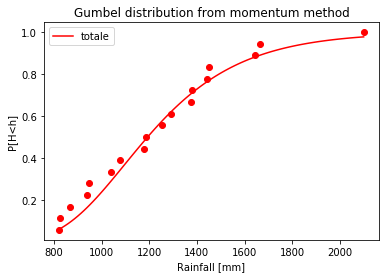

In [91]:
ax = gb.plot(color = ['red'])
datatot = data['totale'].dropna()
ecdf = ECDF(datatot)
ax.plot(datatot, ecdf(datatot), 'o', c = 'red', label = 'totale')
ax.set_xlabel('Rainfall [mm]')
ax.set_ylabel('P[H<h]')
ax.set_title('Gumbel distribution from momentum method')